In [1]:
# Loading libraries for the course
import random
import matplotlib.pyplot as plt             # Library used for plotting
from matplotlib.patches import Rectangle    # Module to plot a rectangle in the image
import urllib.request                       # Library to download data
import numpy as np                          # Library for array manipulation
import seaborn as sn                        # Library for advanced plotting
import pandas as pd                         # Library to manipulate data frames
import tifffile                             # Library to store numpy arrays as TIFF
import pathlib                              # Library to work with file paths
from pathlib import Path                    # Library to work with file paths
import skimage                              # Library for image manipulation. scikit-image
from skimage.io import imread               # Module from skimage
from matplotlib import animation            # Module to plot animations


In [ ]:
# Here Jakini's code provides informaiton on the following: 
# 1. The intensity of this transcirption cite. 
# 2. The coordiantes of the transcription cite.  
# Note that this code applies to only one cell in one tif file. 

# We will use Wiktoria's code to do the following: 
# 1. Identify the coordinates and intensity of trancription cites for every cell in every tif. 
# 2. Count the number of trancrtiption cites in each cell/tif. 

## First we will import the masked tif files

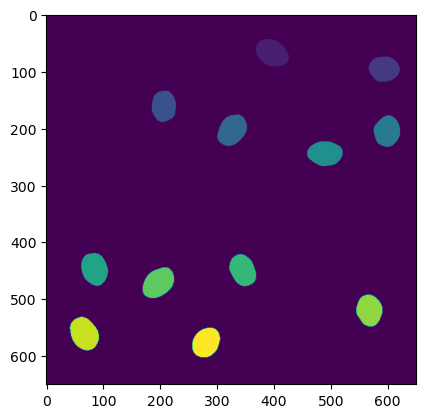

In [5]:
# We will use the mask associated with the first time frame of the first tif. 
# Wiktoria's code will help us to import all masks of all time frames in every tif. 

figName = 'Drug1_1000nM_masks/rep1_FOV1_mask.tif'
img1 = imread(str(figName))
plt.imshow(img1)

## Choose a cell in the masked tif file to work with

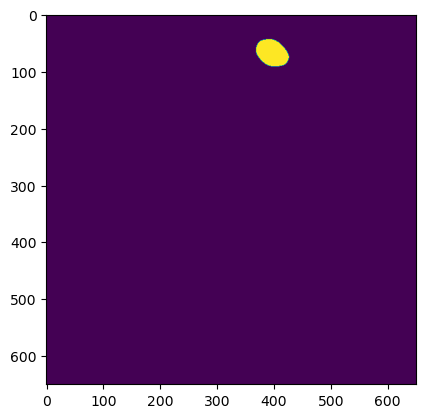

In [7]:
# Here we first work with cell 1 by only showing the pixels of our image that map the first cell. 
# We define "img1" to represent the first masked tif we are using and '1' to be the cell we are analyzing.

img1 == 1

# We can create an isolated image of any cell by changing the '1' above to a number between 1 and n 
# where n is the number of cells in the first time frame. See below for an example: 
# For cell 5, we would write "img1 == 5" and return the 5th cell of the first masked tif. 


## Find the intensity of the transcritption cite 

In [12]:
# Under the assumption that the cell is alive, we find the maximum intensity. 
# Since this code is using the mask of the first time frame, all cells are alive at this time. 

print(np.max(img1[:, :]))

12


## Find the coordiantes of the transcritption cite in the cell (if it exists) 

The x and y coordinates of the trancription cite are: 44 386


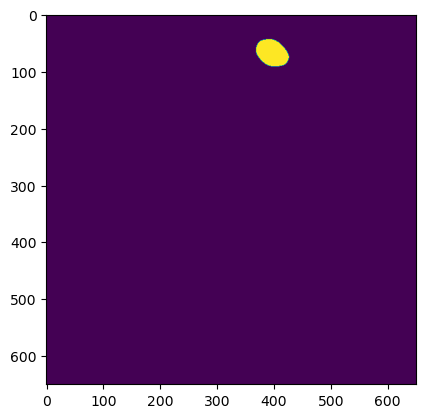

In [19]:
# Note that there can be at most two transcription cites in a cell.
# This does not mean that they are both visible during the same time frame. 

# Recall that we have already chosen cell 1 with the following code: 

img1 == 1

# Now we will find the x and y coordinates of the pixel with the highest intensity. 
# These coordinates will provide the intensity of our respective transcription cite. 

def find_xy_coordinates(mask):
    xy = mask[0,0]
    xindex = 0
    yindex = 0
    i = 1

    while i < mask.shape[0]:
        for j in range(mask.shape[1]):
            if mask[i,j] > xy:
                xy = mask[i,j]
                xindex = i
                yindex = j
        i += 1
        j += 1

    return xindex, yindex

# Example usage:
mask = img1==1
xindex, yindex = find_xy_coordinates(mask)
print("The x and y coordinates of the trancription cite are:", xindex, yindex)

# Note: Python plots similar to matrices with row first, column second. 
# Therefore, your plot looks flipped and you read it along the y-axis first, then the x-axis. 

plt.imshow(img1==1)

# We have plotted this cell to verify that our coordinates look accurate. 

## YOU'RE DONE! YAY :-D

## _____________________________________________________

## PLEASE DO NOT DELETE WHAT IS BELOW: This is extra code that we can use for a future referene. 

In [24]:
np.shape(img)

(21, 650, 650, 3)

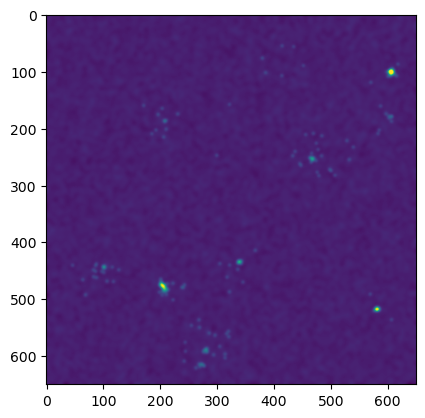

In [32]:
plt.imshow(img[1,:,:,2])
# plt.imshow(img[1,:,:,1]alpha=.3)
plt.imshow(img[1,:,:,2])

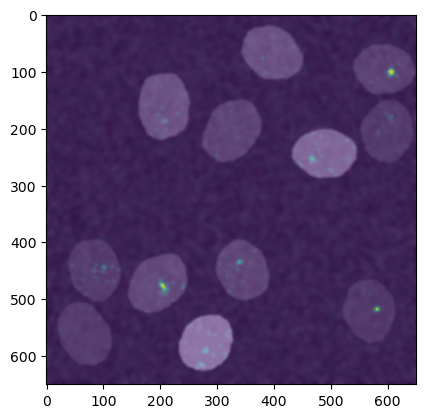

In [50]:
plt.imshow(img[1,:,:,1], cmap='Greys_r')
plt.imshow(img[1,:,:,2], alpha=.6)

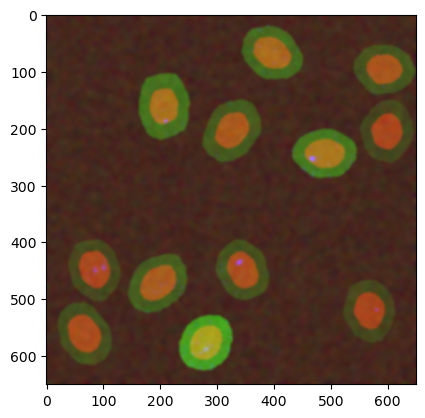

In [53]:
plt.imshow(img[0, :, :, :])

255


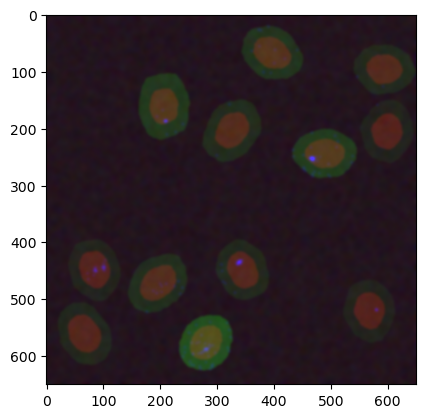

In [61]:
print(np.max(img[0, :, :, 2]))
copy = np.copy(img[0,:,:,:])
copy[:,:,0] = copy[:,:,0]*(1/2)
copy[:,:,1] = copy[:,:,1]*(1/2)
plt.imshow(copy)

In [88]:
# print(np.argmax(img[0,:,:,2], axis=0))
# print(np.max(img[0,:,:,2]))

# Find the largest number in a list of arbitrary numbers (and its index): 

def find_largest_number(numbers):
    largest = numbers[0]
    index = 0
    i = 1

    while i < len(numbers):
        if numbers[i] > largest:
            largest = numbers[i]
            index = i
        i += 1

    return index
    # return largest

# Example usage:
numbers = [5, 10, 3, 15, 7, 20, 25]
largest_number = find_largest_number(numbers)
print("The largest index is:", largest_number)


The largest index is: 6


In [9]:
# Find the x and y coordinates of the largest index: 

def find_xy_coordinates(pixels):
    xy = pixels[0,0]
    xindex = 0
    yindex = 0
    i = 1

    while i < pixels.shape[0]:
        for j in range(pixels.shape[1]):
            if pixels[i,j] > xy:
                xy = pixels[i,j]
                xindex = i
                yindex = j
        i += 1
        j += 1

    return xindex, yindex

# Example usage:
pixels = img[0,:,:,2]
xindex, yindex = find_xy_coordinates(pixels)
print("The x and y coordinates are:", xindex, yindex)

# Note: Python plots similar to matrices with row first, column second. 
# Therefore, your plot looks flipped and you read it along the y-axis first, then the x-axis. 

The x and y coordinates are: 252 466


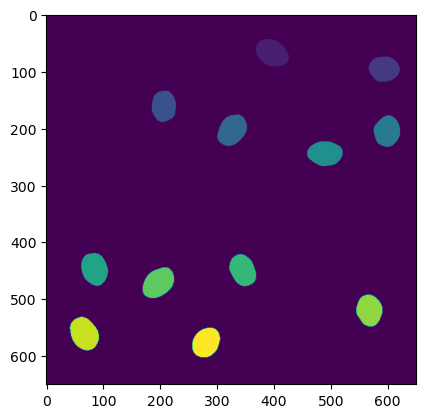

In [16]:
# Importing the image as variable img1
figName = 'Drug1_1000nM_masks/rep1_FOV1_mask.tif'
img1 = imread(str(figName))
type(img1)
plt.imshow(img1)

In [24]:
# Find the x and y coordinates of the largest index: 

def find_xy_coordinates(pixels):
    xy = pixels[0,0]
    xindex = 0
    yindex = 0
    i = 1

    while i < pixels.shape[0]:
        for j in range(pixels.shape[1]):
            if pixels[i,j] > xy:
                xy = pixels[i,j]
                xindex = i
                yindex = j
        i += 1
        j += 1

    return xindex, yindex

# Example usage:
pixels = img1[:,:]
xindex, yindex = find_xy_coordinates(pixels)
print("The x and y coordinates are:", xindex, yindex)

# Note: Python plots similar to matrices with row first, column second. 
# Therefore, your plot looks flipped and you read it along the y-axis first, then the x-axis. 

The x and y coordinates are: 551 283


The x and y coordinates are: 551 283


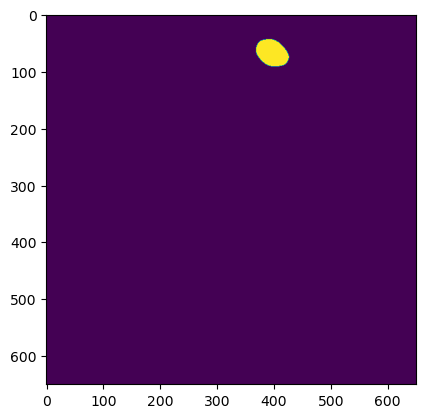

In [31]:
img1 == 1
plt.imshow(img1==1)

# Find the x and y coordinates of the largest index: 

def find_xy_coordinates(pixels):
    xy = pixels[0,0]
    xindex = 0
    yindex = 0
    i = 1

    while i < pixels.shape[0]:
        for j in range(pixels.shape[1]):
            if pixels[i,j] > xy:
                xy = pixels[i,j]
                xindex = i
                yindex = j
        i += 1
        j += 1

    return xindex, yindex

# Example usage:
cell1 = img1[:,:]
xindex, yindex = find_xy_coordinates(pixels)
print("The x and y coordinates are:", xindex, yindex)

# Note: Python plots similar to matrices with row first, column second. 
# Therefore, your plot looks flipped and you read it along the y-axis first, then the x-axis. 

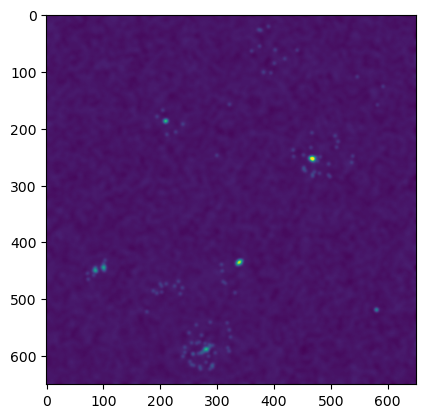

In [7]:
plt.imshow(img[0,:,:,2])